# Practical Session 1 Unsupervised learning
# _________________________________________________________________

## Necessary Imports

In [42]:
#necessary imports
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import sklearn


## Temperature Dataset

### 1 Loading Data

#### Question 1: Load Data

In [3]:
temp_dataset=np.load('temper.npz')
print(type(temp_dataset))

<class 'numpy.lib.npyio.NpzFile'>


In [13]:
#store values
data=temp_dataset.get('data')
cities=temp_dataset.get('villes')
varname=temp_dataset.get('varname')
print('data shape: ',data.shape)
print('cities shape: ',cities.shape)
print('varname shape: ',varname.shape)

x1=[]
for i in range(0,len(data)):
    inter=[]
    x1.append(data[i][:-2].tolist())
x1=np.array(x1)
print('x1 shape: ',x1.shape)


data shape:  (15, 14)
cities shape:  (15,)
varname shape:  (14,)
x1 shape:  (15, 12)


#### Question 2: Plot the mean values 

##### plot avg. temperature for each month 

In [18]:
#check mean of the data per month
mean=np.mean(x1,axis=0)
print(mean.shape)

(12,)


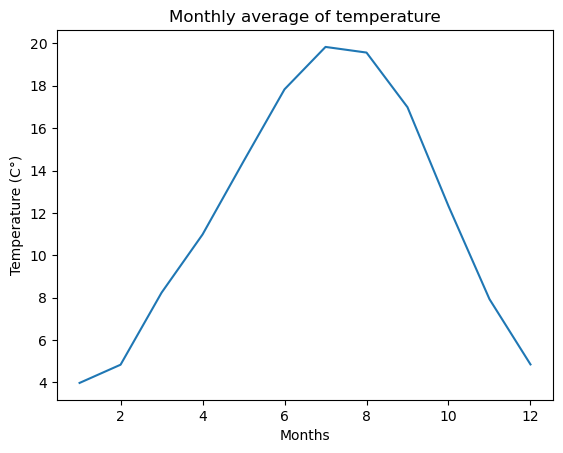

In [19]:
x=np.arange(1,13)
y=mean


# plot
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title('Monthly average of temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C°)')

plt.show()
#

*Interpretation*: we can observe a certain guassian distribution for out averages 
the values seems to be logical with higher temeperature in summer and lower values for winter

#### Question 3 (Bonus)

##### plot for the evolution of temeprature per month and per city

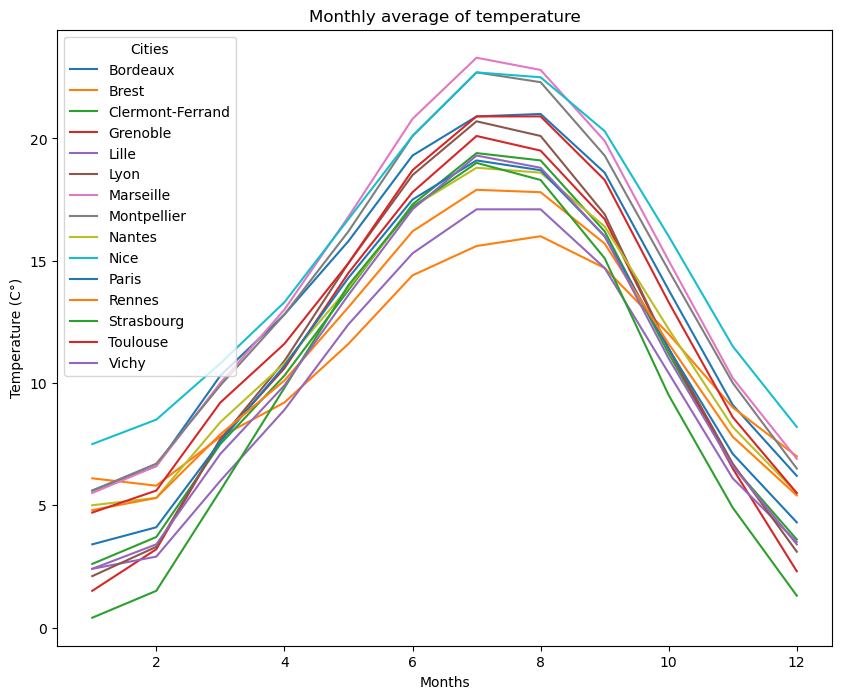

In [20]:
#average per city and per month
x=np.arange(1,13)
y=x1



# plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each point separately with its own label for the legend
for i in range(0,len(cities)):
    ax.plot(x,y[i],label=cities[i])
# for el in y:
#     ax.plot(x, el[1:],label=el[0])
ax.legend(title='Cities',loc='upper left')

plt.title('Monthly average of temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C°)')
plt.show()

##### plot of the cities and mean yearly temeperature 

In [22]:
#check the mean with respect to the cities 
mean_per_city=[]
for el in x1:
    mean_per_city.append(np.mean(el[1:]))  

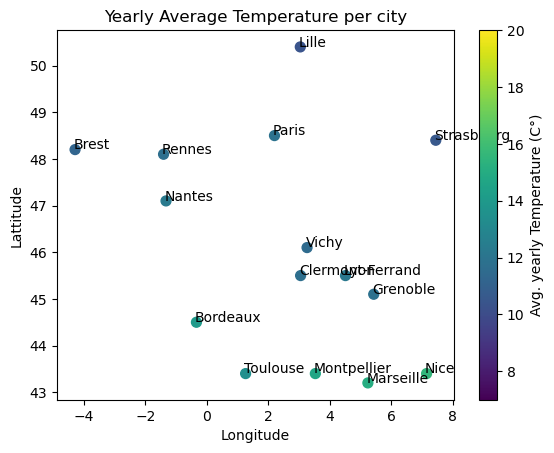

In [ ]:
x_months=np.arange(1,13)
y=np.array(mean_per_city)
geo=data[:,-2:] #get the geo location


# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y, vmin=7, vmax=20, cmap='viridis', s=50)

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Avg. yearly Temperature (C°)')

# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)

# Add labels and title
ax.set_title('Yearly Average Temperature per city')
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

plt.show()



### 2 Clustering

#### 2.1 For both Dataset

##### Question 1: Perfrom K-means with K=3

In [26]:
#Intiating the model 
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans k=3
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

##### Question 2: Plot the centroids with K=3

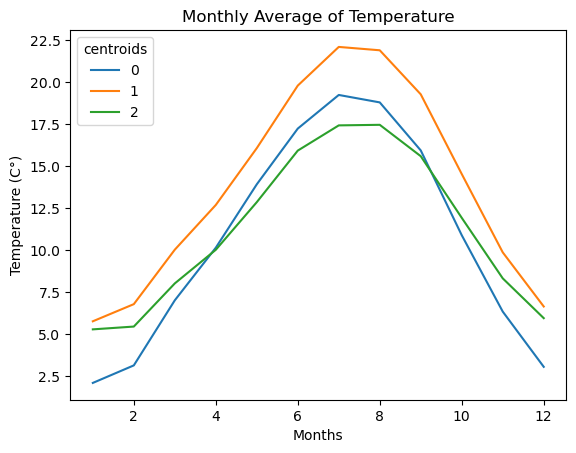

In [ ]:
x_months=np.arange(1,13)
cleaned_centroids=centroids #take out the longitude and lattitude

# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i,el in enumerate(cleaned_centroids):
    ax.plot(x_months,el,label=i)


# Add labels and title
ax.legend(title='centroids',loc='upper left')
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()



*Interpretation*: with K=3
- 0: cities very cold in winter and have an average summer (northern cities and probably regions in middle because of the inlfuence of the alpes specially in winter)
- 1: cities hotter on average in winter and as well in summer (probably southern cites)
- 2: cities with an average summer temperatures but also a not very cold winter (it's the class with the slowest variance a big chance it's the bretanie region) 

##### Question 3: Perfrom K-means with other K and plot the centroids

In [ ]:
#Intiating the model k=4
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans 
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

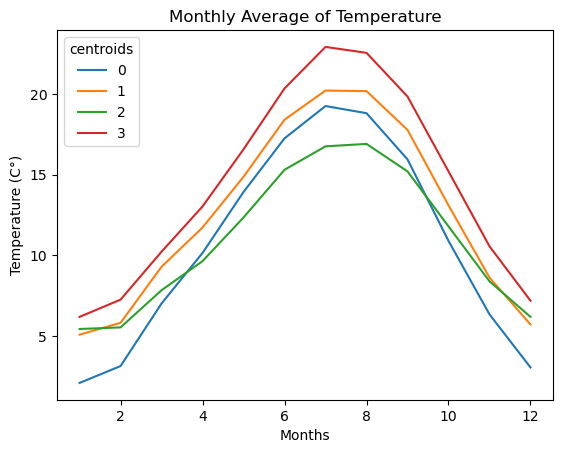

In [ ]:
x_months=np.arange(1,13)

cleaned_centroids=centroids #take out the longitude and lattitude

# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i,el in enumerate(cleaned_centroids):
    ax.plot(x_months,el,label=i)


# Add labels and title
ax.legend(title='centroids',loc='upper left')
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()



*Interpretation*: with k=4
- 0: cities very cold in winter and have an average summer
- 1: cities hotter on average in winter and as well in summer (probably southern cites)
- 2: cities with an average summer temperatures but also a not very cold winter (it's the class with the slowest variance a big chance it's the bretanie region)
- 3: cities with hotter sumer and hotter winter probably cities that are in the south but not on facing the sea hence the great heat in summer 

#### 2.2 Plot clusters per geograhpical positions

In [38]:
#Intiating the model 
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans 
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

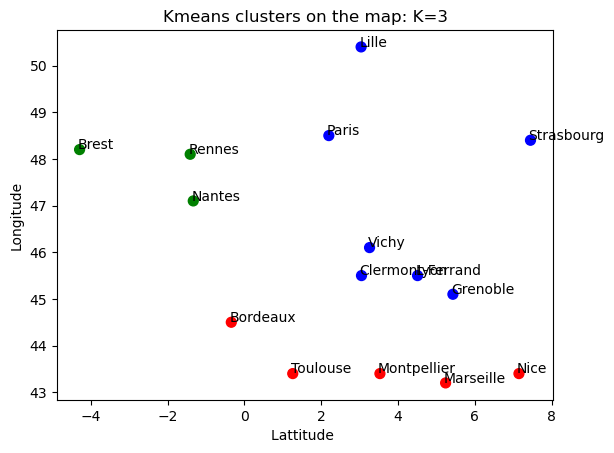

In [39]:
x_months=np.arange(1,13)
y=labels
geo=data[:,-2:] #get the geo location
colors=['blue','red','green']
cmap=ListedColormap(colors)

geo_centroids=centroids

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)

# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)

# Add labels and title
ax.set_title('Kmeans clusters on the map: K=3')
ax.set_xlabel('Lattitude ')
ax.set_ylabel('Longitude')

plt.show()

*Interpretation*: clearly geography has an impact on the K-means labeling. But isn't temperture strongly linked to geography (mountains, sea...).
Hence even if the geographical data wasn't included in the K-means we can observe it's influence.

Try with k=4

In [40]:
#Intiating the model 
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=42,n_init="auto")

#fit the kmeans 
kmeans.fit(x1)

#store the centroids and labels for plotting
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

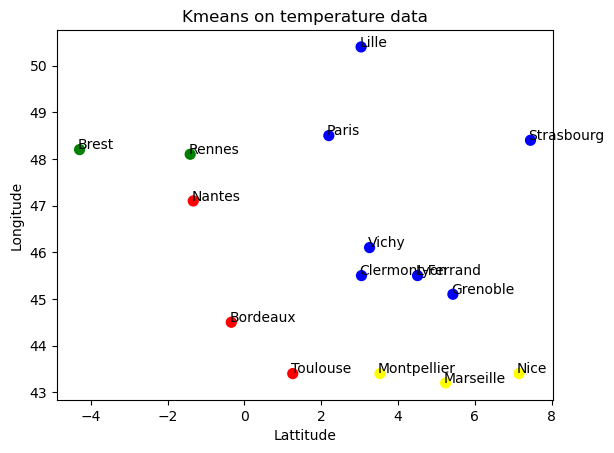

In [41]:
#fit the kmeans k=4
from matplotlib.colors import ListedColormap

 
kmeans=KMeans(n_clusters=4,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_


y=labels
geo=data[:,-2:] #get the geo location
colors=['blue','red','green','yellow']
cmap=ListedColormap(colors)

geo_centroids=centroids[:,-2:]

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)

# for i in range(0,len(centroids)):
#     ax.scatter(geo_centroids[i,1],geo_centroids[i,0],color=colors[i],edgecolors='black',linewidth=1.5,s=100)


# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)


# for i in range(0,len(centroids)):
#     ax.text(geo_centroids[i,1]-0.05, geo_centroids[i,0]+0.01, i, fontsize=10)


# Add labels and title
ax.set_title('Kmeans on temperature data')
ax.set_xlabel('Lattitude')
ax.set_ylabel('Longitude')

plt.show()



*Interpreation*: hen we observe the k=4 we can realize that the geographical impact has reduces (in termes of lattitude/longitude).
- Cities who are very cold in the winter yet slightly hot have their own cluster (Paris, Lyon)
- Cities colder all year around have their cluster (Brest, Rennes)
- Cities that are hotter but a summer that is slightly fresh (the sea acess) hence Nice, Marseille get their clusters
- Cities with hot summers and the winter isn't very intense (Toulouse and Bordeaux).
Here clearly with an increase of clusters we demonstrated that there's a hidden impact that made a seperation with existent clusters in the case of 
K=3. The example, I keep is the seperation between Bordeaux and Toulousue from the southern cities. 

### 3 Density Estimation

#### 3.1 For both Databset

##### Question 1: Estimate GMM density (components=2)

In [43]:
temp_GMM=sklearn.mixture.GaussianMixture(n_components=2,covariance_type='diag',random_state=42)
temp_GMM.fit(x1)
gaussian_centers=temp_GMM.means_

##### Question 2: Plot centers of Guassian distributions (components=2)

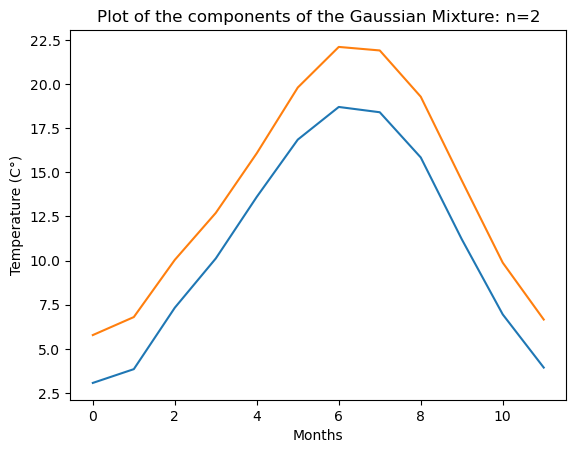

In [44]:
# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for mean in gaussian_centers:
    ax.plot(mean)


# Add labels and title
ax.set_title('Plot of the components of the Gaussian Mixture: n=2')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

#by having two componnents the most obvious way to interpret this with a guassian for north (lower temp) and south gaussian (higher temp) 

*Interpretation*: Since we imosed 2 components the most obvious observation is having two gaussians one for northern cities and one for southern cities

##### Question 3: Repeat with different component number 

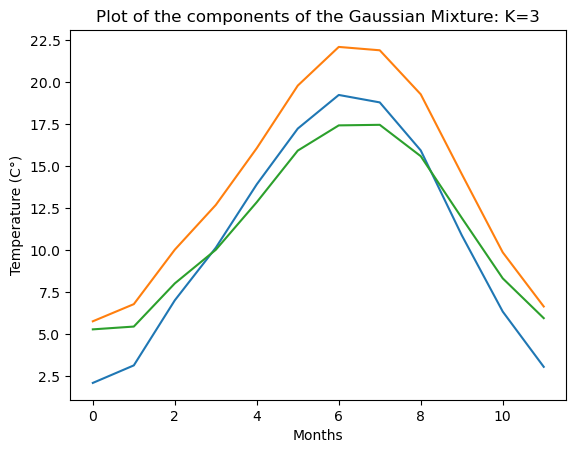

In [46]:
#try for k=3
temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=42)
temp_GMM.fit(x1)
gaussian_centers=temp_GMM.means_



# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for mean in gaussian_centers:
    ax.plot(mean)


# Add labels and title
ax.set_title('Plot of the components of the Gaussian Mixture: K=3')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

*Interpreation*: 
- For me a good value could 3 components as for the cities we accounted for we have:
    - North cities with no access on sea (so low winter temperature but high temperature in summer as well)
    - south cities (higher temp in winter with a high temp in summer)
    - coastal cities that keep a low variance (low temp for a winter and a low temp for a summer)

Observe Covariances

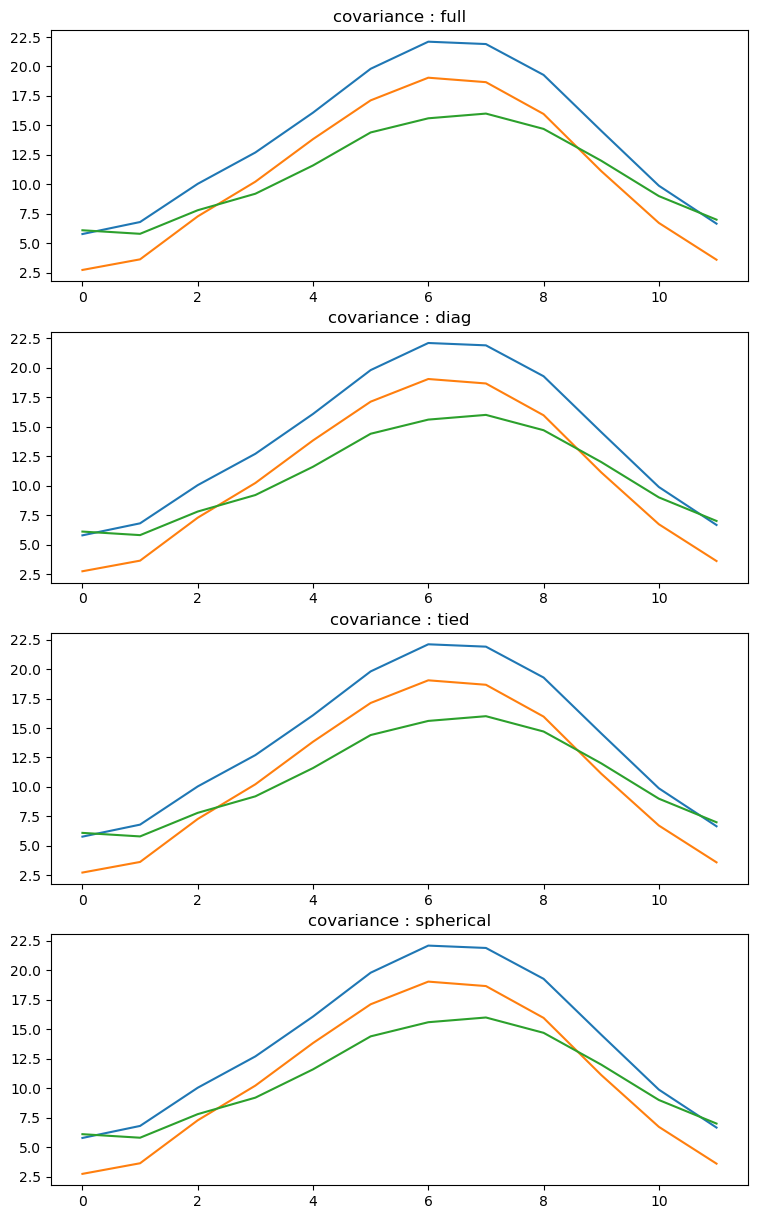

In [50]:
# observe different covariances
covariances=['full','diag','tied','spherical']

fig, axes = plt.subplots(4, 1, figsize=(9, 15))
for ax, covariance in zip(axes,covariances):
    #print(covariance)
    temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type=covariance,random_state=30)
    temp_GMM.fit(x1)
    means=temp_GMM.means_
    for mean in means:
        ax.plot(mean)
    ax.set_title('covariance : '+covariance)


##### Question 4: 

In [57]:
#let's stick with 'diag' and components=3
temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=42)
temp_GMM.fit(x1)
means=temp_GMM.means_

#get the log prabability
log_prob_temp=temp_GMM.score_samples(x1)

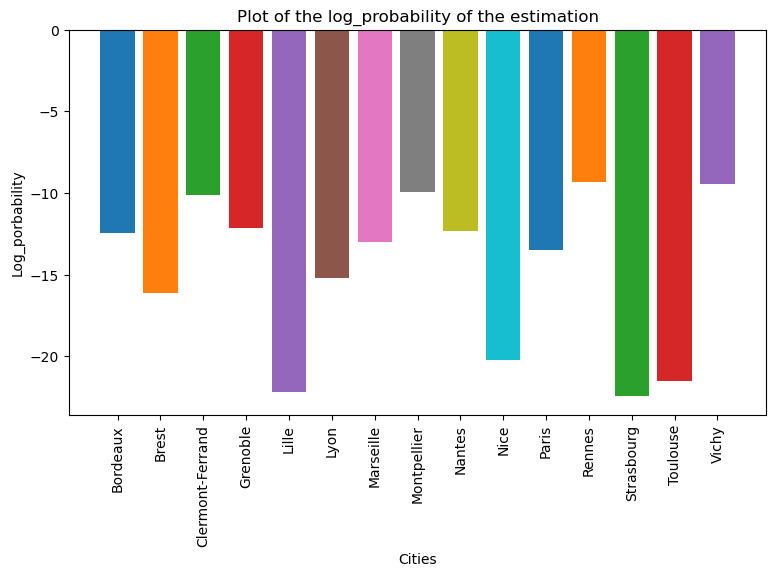

In [58]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i in range(0,len(cities)):
    ax.bar(cities[i],log_prob_temp[i])


# Add labels and title
ax.set_title('Plot of the log_probability of the estimation')
ax.set_xlabel('Cities')
ax.set_ylabel('Log_porbability')
ax.tick_params(axis='x',labelrotation=90)

plt.show()

#the most obvious outlier is brest this maybe the most expected city since the weather in bretagne 
#stays very similar all the years with a rleatively cold summer and relatively hot winter.
# strabourg and Nice also slightly stand out as the temperatures in winter could get very could
# as they are very to the north
# Another observation is Toulouse which because of it's position between the mountains makes it 
# have a very hot summer compared to Bordeaux 


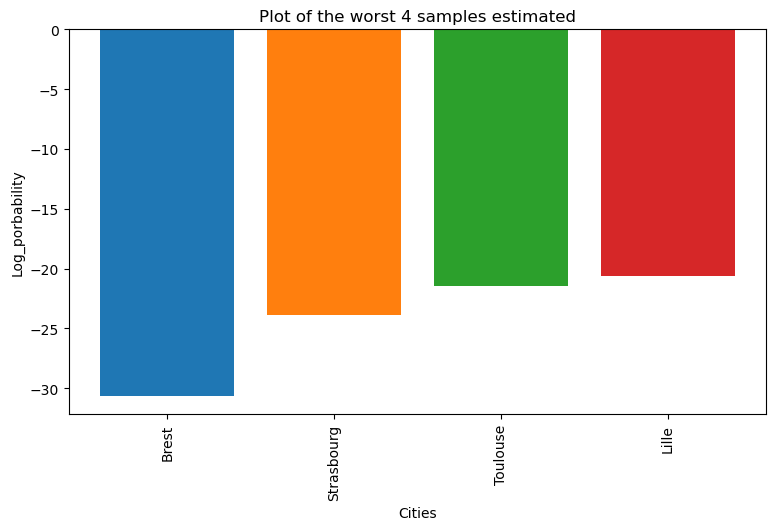

In [ ]:
# Get indices of worst (least probable) samples only the 4 worst samples
outlier_idx = np.argsort(log_prob_temp)[:4]

# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i in outlier_idx:
    ax.bar(cities[i],log_prob_temp[i])


# Add labels and title
ax.set_title('Plot of the worst 4 samples estimated')
ax.set_xlabel('Cities')
ax.set_ylabel('Log_porbability')
ax.tick_params(axis='x',labelrotation=90)

plt.show()


# ------------------STOP HERE------------------------

In [2]:
temp_dataset=np.load('temper.npz')
digits_dataset=np.load('digits.npz')
print(type(temp_dataset))
print(type(digits_dataset))


<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.lib.npyio.NpzFile'>


#### Digits dataset


In [10]:
digits_dataset.files

['xt', 'yt', 'y', 'x']

In [11]:
digi_x=digits_dataset.get('x')
digi_xt=digits_dataset.get('xt')
digi_y=digits_dataset.get('y')
digi_yt=x=digits_dataset.get('yt')

print('x: ',digi_x.shape)
print('xt: ',digi_xt.shape)
print('y: ',digi_y.shape)
print('yt: ',digi_yt.shape)

x:  (3000, 784)
xt:  (1500, 784)
y:  (3000, 1)
yt:  (1500, 1)


In [12]:
x2=np.concatenate([digi_x, digi_xt], axis=0)
print('x2:',x2.shape)
#normalize
x2=x2.astype(np.float32)/255.0

y2=np.concatenate([digi_y, digi_yt], axis=0)
print('y2:',y2.shape)
#no need to normalize the classes values



x2: (4500, 784)
y2: (4500, 1)


(784,)
(28, 28)


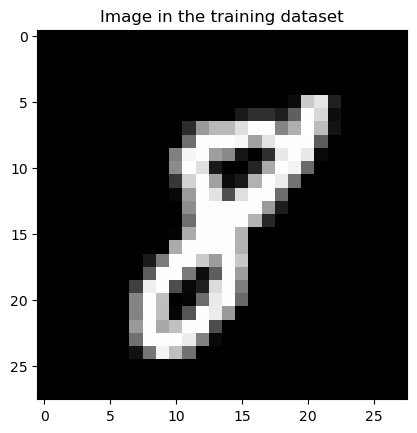

In [13]:
#change the index as you want 0-999 images of number 1
# 1000-1999 images of 7
# 2000-2999 images of 8
vector_image=x2[2000] 
img=vector_image.reshape(28,28)
print(vector_image.shape)
print(img.shape)
plt.imshow(img,cmap="gray")
plt.title('Image in the training dataset')
plt.show()

(784,)
(28, 28)


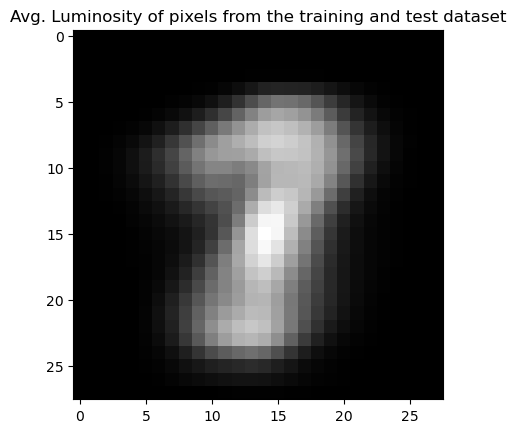

In [14]:
digit_mean=np.mean(x2,axis=0)
print(digit_mean.shape)

img_mean=digit_mean.reshape(28,28)
print(img_mean.shape)
plt.imshow(img_mean,cmap="gray")
plt.title('Avg. Luminosity of pixels from the training and test dataset')
plt.show()

### 2 Custering

#### Digits dataset

- plot the centroids (because we are in higher dimensions we would use PCA for plotting)

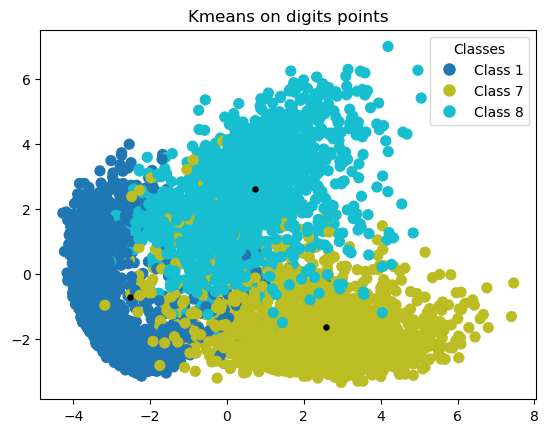

In [24]:
from matplotlib.lines import Line2D

#apply Kmeans clustering for digits k=3
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#Apply PCA to be able to plot 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2_2D = pca.fit_transform(x2)

#let's transform the centroîds as well
centroids_2D = pca.transform(centroids)

#Now for the plot

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)

for i in range(0,len(centroids_2D)):
    ax.scatter(centroids_2D[i][0],centroids_2D[i][1],color='black',edgecolors='black',linewidth=1.5,s=10)
    
    
#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('Kmeans on digits points')
plt.show()
#the clusters seems to be very well spread around the classes

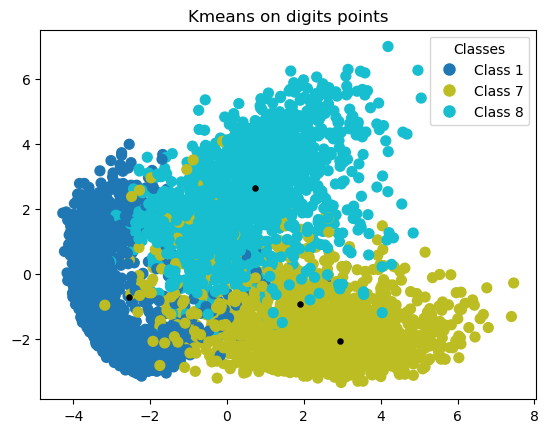

In [25]:
from matplotlib.lines import Line2D

#apply Kmeans clustering for digits k=4
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#Apply PCA to be able to plot 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2_2D = pca.fit_transform(x2)

#let's transform the centroîds as well
centroids_2D = pca.transform(centroids)

#Now for the plot


# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)

for i in range(0,len(centroids_2D)):
    ax.scatter(centroids_2D[i][0],centroids_2D[i][1],color='black',edgecolors='black',linewidth=1.5,s=10)
    
    
#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('Kmeans on digits points')


plt.show()

#with k=4 we can observe a new cluster that encapsulates some class 1 and 7 which is expected since the writing 1, 7 
# are alot closer then 1,8 or 7,8.



- Display of centroids images (the average of the images composing the cluster)
work with k=3

In [26]:
#apply Kmeans clustering for digits k=3
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

In [27]:
images=[]
for el in centroids:
    images.append(el.reshape(28,28))
print(len(images))

3


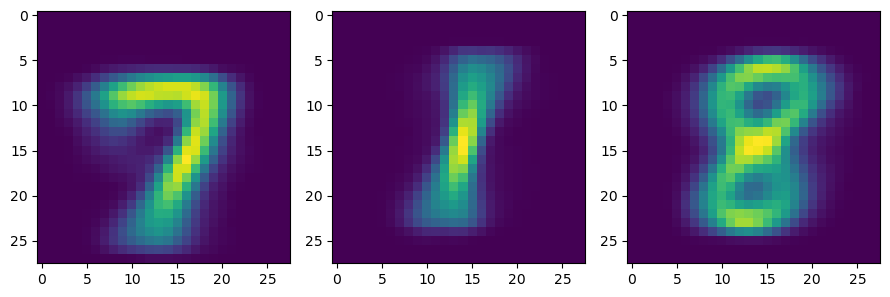

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, img in zip(axes,images):
    ax.imshow(img)
    
plt.tight_layout()
plt.show()

#Images are not very clear but we can observe a 7,1,8 which corresponds to our classes 
#we can say the do to a certain extent resemble a image from our dataset
#!! could you tell if a cluster centroid is a true image ? >> yes since it's the average of another images
# so it's a bad quality image 

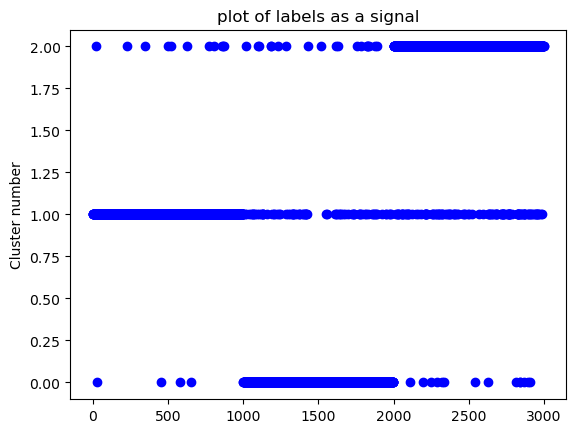

In [ ]:
#plot the predicted labels as signal 
#let's consider only labels from the training x as it follows a certain order
signal_labels=labels[:-len(digi_xt)]
x_signal=np.arange(len(signal_labels))

# plot
fig, ax = plt.subplots()
ax.scatter(x_signal, signal_labels ,linestyle='-', color='blue')
plt.title('plot of labels as a signal: K=3')
plt.ylabel('Cluster number')

plt.show()
## we can observe 
## for cluster 0 it's more around [1000-1999]
## for cluster 2 it is around [2000-2999]
## for cluster 1 which represents the the class '1' it doesn't seem to be respecting the order
## this mainly because the number 1 in written is a composition of 7 and 8 so a badly written 
## 7 or 8 are easily interpeted as 1 but on the other hand a badly written 8 or 7 can be hardly 
## assigned as 1

- Check the quality of the clustering 

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score
#Kmeans for K=3
#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)


ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)



Rand Index: 0.8876126546639994
Adjusted Rand Index: 0.7481880864638025


- check the effect of the K value on the clustering score

K=2

In [31]:
#apply Kmeans clustering for digits k=2
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

Rand Index: 0.685129436171001
Adjusted Rand Index: 0.3988442714842137


K=4

In [32]:
#apply Kmeans clustering for digits k=4
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

Rand Index: 0.8271510212145909
Adjusted Rand Index: 0.5726374799710744


- Both increasing and decrasing negatively affect the performance and score of our model. This is mainly due to the fact that our data by definition only incldes three classes (1,7,8). Using this affirmation can help us identify that the best k is 3.

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#Elbow method to find the optimal k

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(x2)
    
    distortions.append(sum(np.min(cdist(x2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / x2.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 43.01885673222738
2 : 38.45075533963005
3 : 34.623605797416204
4 : 33.28629894002
5 : 31.13401066321285
6 : 30.301208726721164
7 : 28.95139906094761
8 : 28.56283765020955
9 : 27.825563458325774


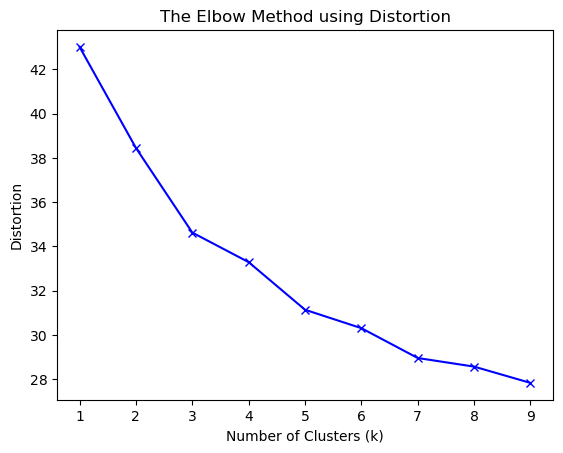

In [34]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 193584.796875
2 : 173028.4375
3 : 155806.296875
4 : 149788.359375
5 : 140103.0625
6 : 136355.421875
7 : 130281.28125
8 : 128532.71875
9 : 125215.0


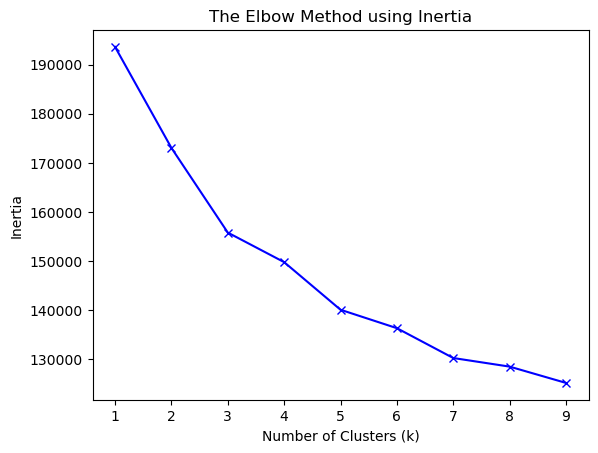

In [35]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# ------------------STart HERE------------------------

### 3 Density estimation

#### Temperature Dataset

Digits Dataset

K=3

In [80]:
temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=42)
temp_GMM.fit(x2)
gaussian_centers=temp_GMM.means_

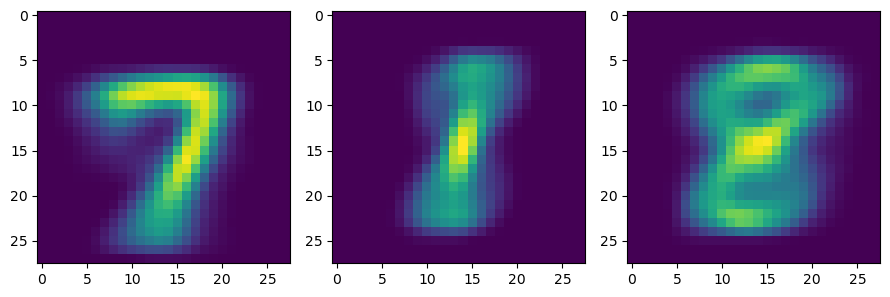

In [83]:
fig, axes = plt.subplots(1, gaussian_centers.shape[0], figsize=(9, 3))
for ax, img in zip(axes,gaussian_centers):
    ax.imshow(img.reshape(28,28))
    
plt.tight_layout()
plt.show()

# we can clearly observe a 7 and an 8 but the image representing the cluster of '1'
# seems to be distorted with it looking like 8, 7, or even a 1. this is mainly bcause 
# the shape of 1 is a major component in the shape of number 7. As for 8 it's composed of 
# of a slightly tilted 1. Hence the non-clarity and the blured image of the centroids of cluster
# 1 could be justified.


K=5

In [87]:
temp_GMM=sklearn.mixture.GaussianMixture(n_components=5,covariance_type='diag',random_state=42)
temp_GMM.fit(x2)
gaussian_centers=temp_GMM.means_

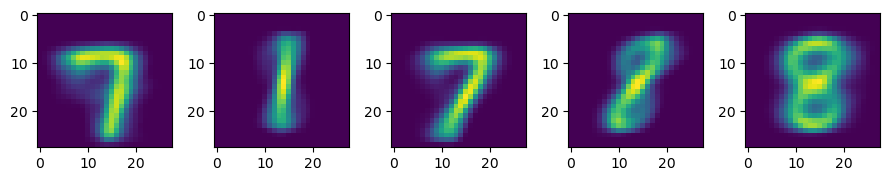

In [91]:
fig, axes = plt.subplots(1, gaussian_centers.shape[0], figsize=(9, 3))
for ax, img in zip(axes,gaussian_centers):
    ax.imshow(img.reshape(28,28))
    
plt.tight_layout()
plt.show()

# observe a new 7 and 8 clusters which aleviated the bluriness on the 1 cluster that became
# clearer. Altough because of the nature of our classification and the fact that we have 
# 3 classes, the best value for K reamins 3 


- Multiple covarainces

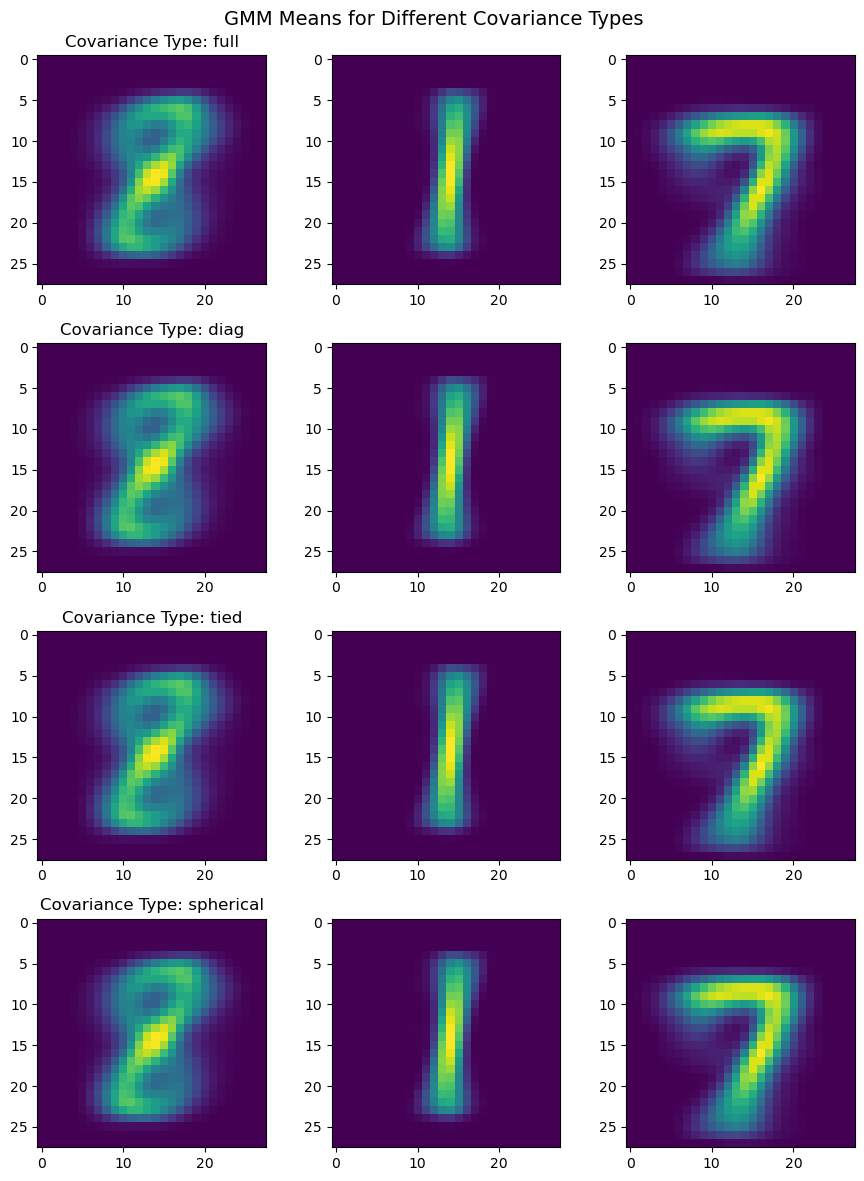

In [120]:
# observe different covariances for components=3
covariances=['full','diag','tied','spherical']
covariances_gaussian_centers=[]

fig, axes = plt.subplots(len(covariances), 3, figsize=(9, 12))  # 4 rows (cov types), 3 columns (components)

for row, el in enumerate(covariances):
    temp_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type=covariance,random_state=30)
    temp_GMM.fit(x2)
    means=temp_GMM.means_

    for col, mean in enumerate(means):
        ax=axes[row,col]
        ax.imshow(mean.reshape(28,28))
        if col==0:
            ax.set_title(f"Covariance Type: {el}")

plt.suptitle("GMM Means for Different Covariance Types", fontsize=14)
plt.tight_layout()
plt.show()

Log probability

In [130]:
#let's stick with 'diag' and components=3
digits_GMM=sklearn.mixture.GaussianMixture(n_components=3,covariance_type='diag',random_state=30)
digits_GMM.fit(x2)
means=temp_GMM.means_

In [131]:
log_prob_digits=digits_GMM.score_samples(x2)

In [ ]:
# Get indices of worst (least probable) samples only the 4 worst samples
outlier_idx = np.argsort(log_prob_digits)[:30]


In [135]:
len(outlier_idx)

10

In [141]:
for ax in axes:
    print(ax[1])

Axes(0.285345,0.53;0.133621x0.35)
Axes(0.285345,0.11;0.133621x0.35)


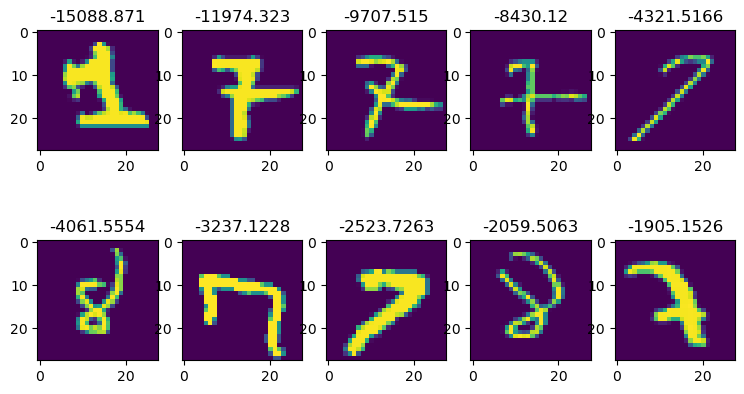

In [ ]:


# Create figure and axes
fig, axes = plt.subplots(2,5,figsize=(9, 5))


for ax,i in zip(axes[0],outlier_idx[:5]):
    ax.imshow(x2[i].reshape(28,28))
    ax.set_title(str(log_prob_digits[i]))

for ax,i in zip(axes[1],outlier_idx[5:]):
    ax.imshow(x2[i].reshape(28,28))
    ax.set_title(str(log_prob_digits[i]))


plt.show()

#it's very interessting that a sven with a central tick is one of the outliers this means our model 
# ins't very good at predicting thesing shapes of the seven, same observation for the 
# 8 when the upper circl isn't properly closed down 
# the fact that we don't have a a lot of 1 might due to the 1 either being considered 
# as a 7 with high probability.


Predict the values

- Predcit the values with GMM
    - recall the score of the Kmeans (K=3)
        - Rand Index: 0.8876126546639994
        - Adjusted Rand Index: 0.7481880864638025

In [ ]:
y_pred=digits_GMM.predict(x2)
y_true=y2.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)

# in Rand Index the values are close, hence we can say both models are very close in
#determining the right clusters
# On the other hand we oserve a great disparity in the ARI where Kmeans is around =0,74 
# and GMM trails behind at 0,44. This observation tells ous that our GMM acutally isn't a 
# vey good model as most of the good prediction that helped him attain a good RI where by chance 
# (a lots of points who where faslely predicted but had a good score on difference)
# not it's not better then KMEANS

Rand Index: 0.7447232224444938
Adjusted Rand Index: 0.4454052846519002


### Bonus Could be done!!!

### Dimensionality reduction

#### Temperature Dataset

In [160]:
x1=np.array(x1)

In [161]:
import seaborn as sns 
temp_cov_matrix=np.cov(x1.T)


<Axes: >

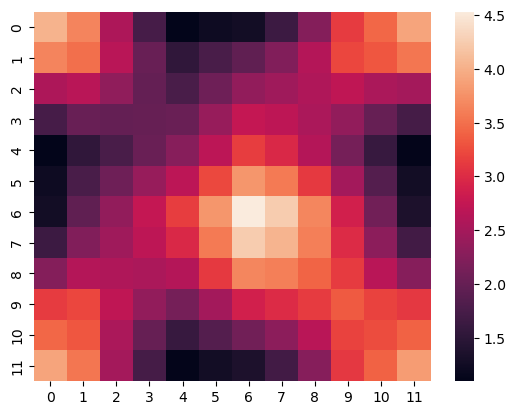

In [ ]:
sns.heatmap(temp_cov_matrix)
# it seems that high values of covariances are concentrated on the center and also 
# on the four corners.
# This first demonstrates a high covariance between summer months (6,7,8) specially 
# between june and july. As for the corners extremeties we have winter months such 10, 11 
# with 0 and 1 (ofc keep in mind to add +1 to the indexes)  

In [184]:
from matplotlib.lines import Line2D

#Apply PCA to be able to plot 
from sklearn.decomposition import PCA
temp_pca=PCA(n_components=None)
x1_pca = temp_pca.fit(x1)



In [185]:
tem_pca_explained_variance=pca.explained_variance_ratio_

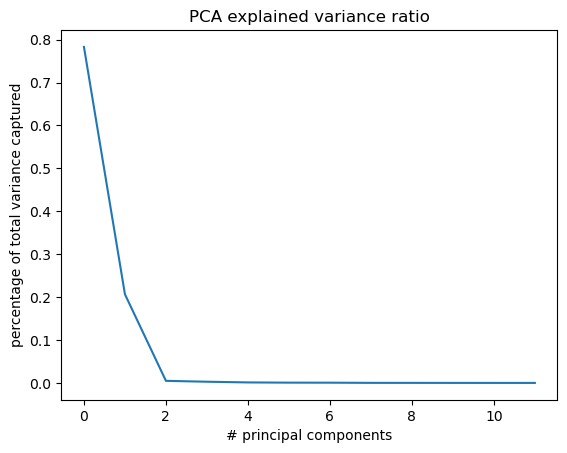

In [186]:
#Now for the plot

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.plot(tem_pca_explained_variance)
ax.set_ylabel('percentage of total variance captured')
ax.set_xlabel('# principal components')

ax.set_title('PCA explained variance ratio')
plt.show()

#clearly with 2 pcs we capture all the variance of our data hence no need to go above 2 PCs 

In [195]:
# let's project on 2 components
temp_pca=PCA(n_components=2)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)


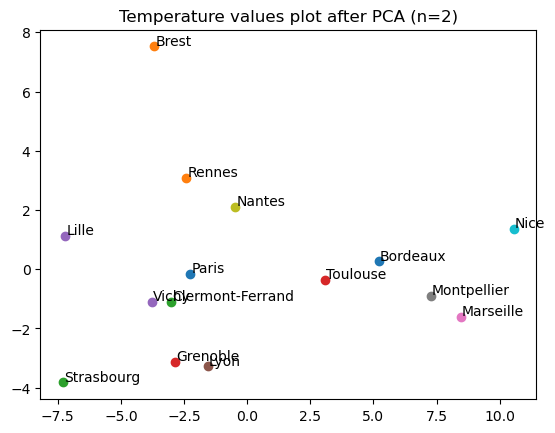

In [198]:
#Now for the plot

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
for i in range(0,len(x1_pca)):
    ax.scatter(x1_pca[i][0],x1_pca[i][1])
    ax.text(x1_pca[i][0]+0.05,x1_pca[i][1]+0.05,cities[i])


ax.set_title('Temperature values plot after PCA (n=2)')
plt.show()

#clearly with 2 pcs we capture all the variance of our data hence no need to go above 2 PCs 
# so we can observe that cities that have closer average yearly temperature got closer to each otehr 
# such as Toulouse, Bordeaux who got very close to montpellier and marseille. same to say for Grenoble and Lyon
# on the other hand clerment and vichy who have a slightly colder summer got closer to paris who shares
# similar weather.
# one funny constat is that rennes got further from Nantes meaning they have a difference in weather 
# this can interpreted by the sea presence in Nantes that give a colder summer.
# of course the weather is strongly correlated to geography hence even though we never used 
# geo data we still observe some logical regroupement based on geography


In [207]:
temp_pca.components_[1]

array([ 0.44271144,  0.29596995,  0.07437784, -0.10733591, -0.25565325,
       -0.3209949 , -0.40635887, -0.31355378, -0.1457905 ,  0.09718023,
        0.25000485,  0.41750952])

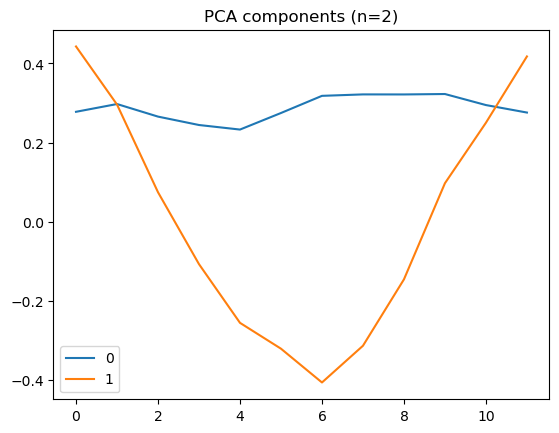

In [ ]:
# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
for i,el in enumerate(temp_pca.components_):
    ax.plot(el,label=i)
    
ax.legend()
ax.set_title('PCA components (n=2)')
plt.show()
#for the componenent 1 it seems that months that impact the most are month with extreme
# temperature, either winter or summer. Hence say that component 1 spans on data temps that lay out 
# of the average temperature (seasonal variations). and componnent 0 focus on the average evolution of 
# temperature

In [293]:
#do PCa with no imposed components
temp_pca=PCA(n_components=1)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)


In [290]:
x1_pca[:][:p].shape

(4, 12)

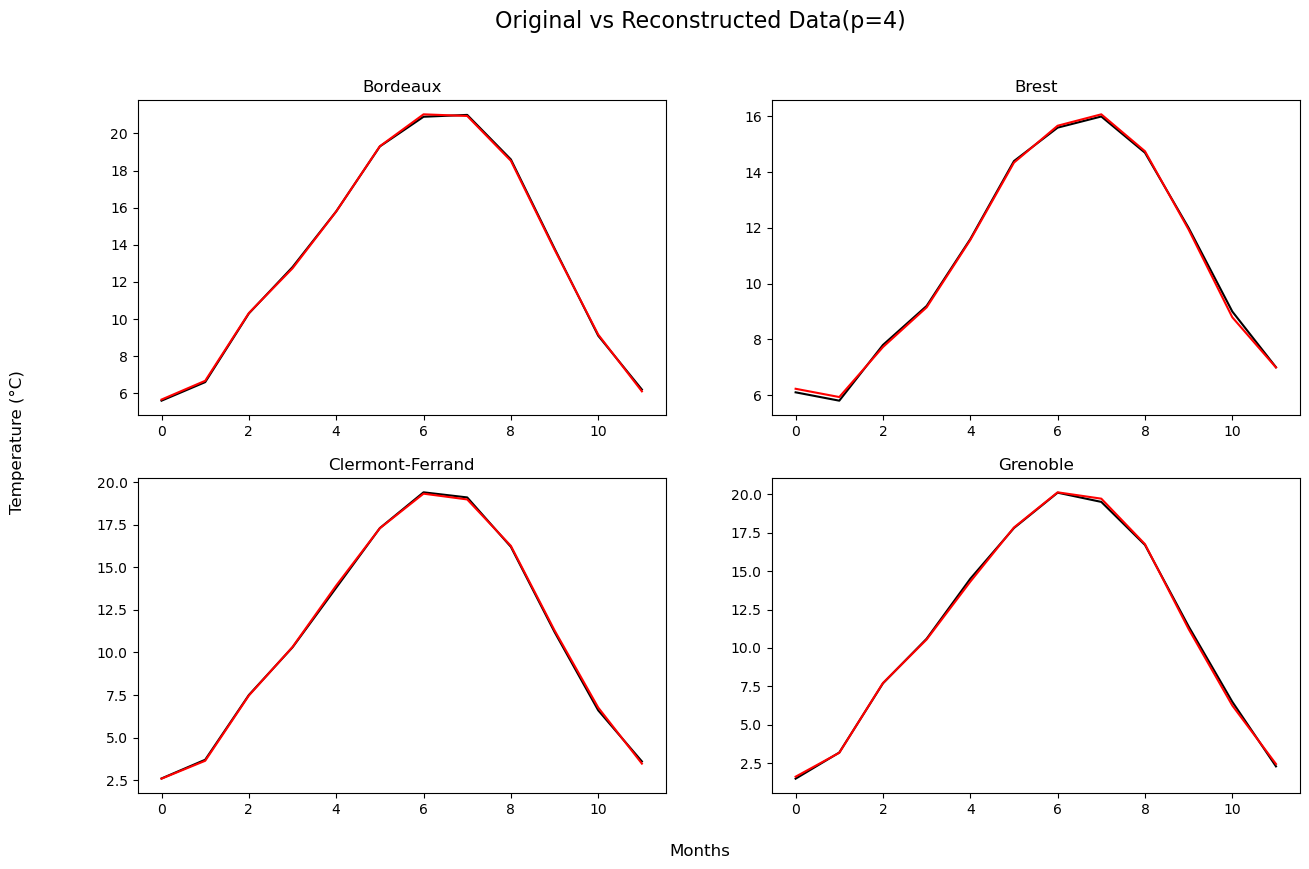

In [297]:
#let p=4
p=4
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)
x_inverse=temp_pca.inverse_transform(x1_pca)
# Create figure and axes
fig, axes = plt.subplots(2,p//2,figsize=(15, 9))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,p):
    if(i ==2 ):
        index+=1
    axes[index,i%2].plot(x1[i],color='black',label='original')
    axes[index,i%2].plot(x_inverse[i],color='red',label='reconstructed')
    axes[index,i%2].set_title(cities[i])


fig.suptitle('Original vs Reconstructed Data(p=4)', fontsize=16)
fig.text(0.5, 0.04, 'Months', ha='center', fontsize=12)        # x-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical', fontsize=12)  # y-axis label

plt.show()


#by having two componnents the most obvious way to interpret this with a guassian for north (lower temp) and south gaussian (higher temp) 

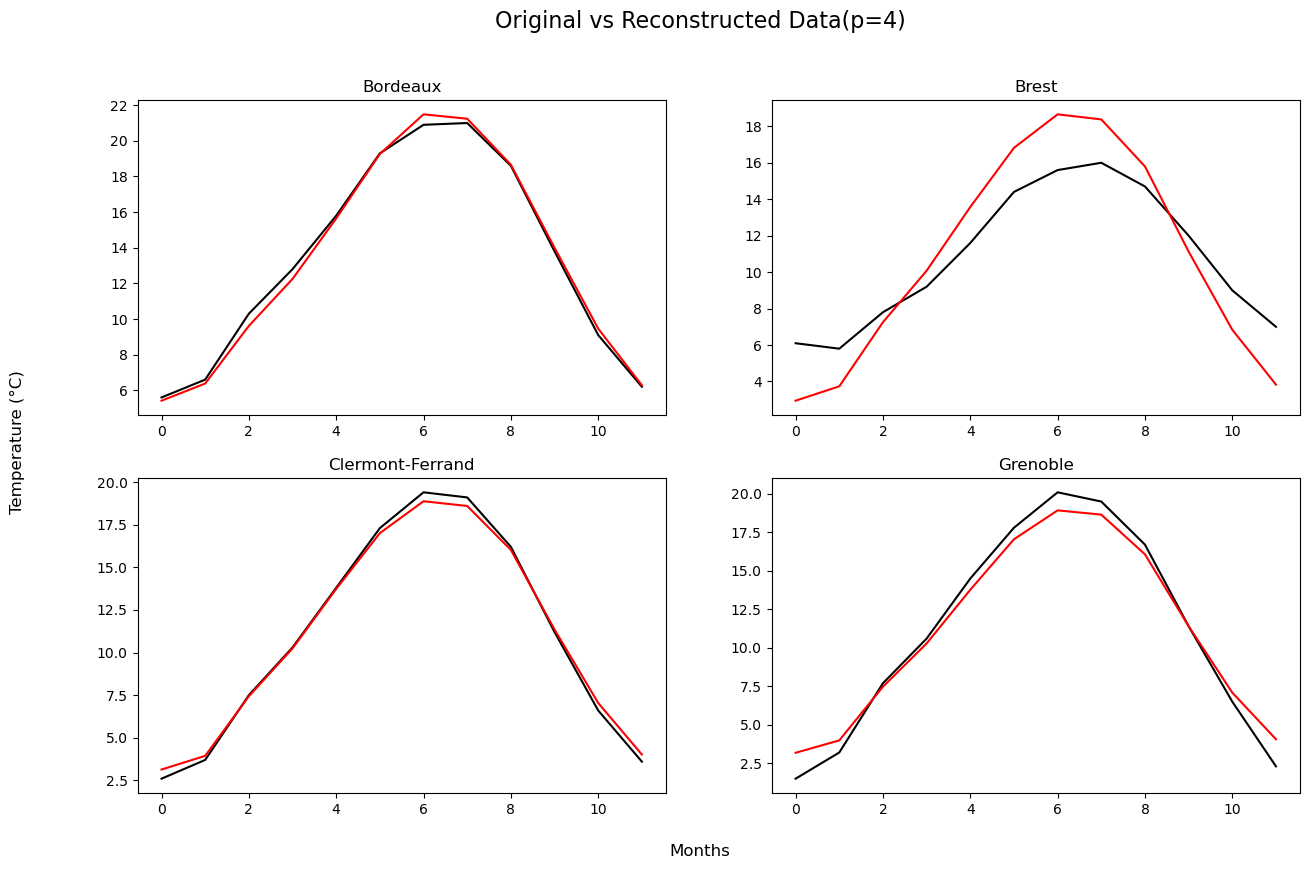

In [299]:
#let p=4
p=1
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)
x_inverse=temp_pca.inverse_transform(x1_pca)
# Create figure and axes
fig, axes = plt.subplots(2,4//2,figsize=(15, 9))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    if(i ==2 ):
        index+=1
    axes[index,i%2].plot(x1[i],color='black',label='original')
    axes[index,i%2].plot(x_inverse[i],color='red',label='reconstructed')
    axes[index,i%2].set_title(cities[i])


fig.suptitle('Original vs Reconstructed Data(p=4)', fontsize=16)
fig.text(0.5, 0.04, 'Months', ha='center', fontsize=12)        # x-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical', fontsize=12)  # y-axis label

plt.show()


#by having two componnents the most obvious way to interpret this with a guassian for north (lower temp) and south gaussian (higher temp) 

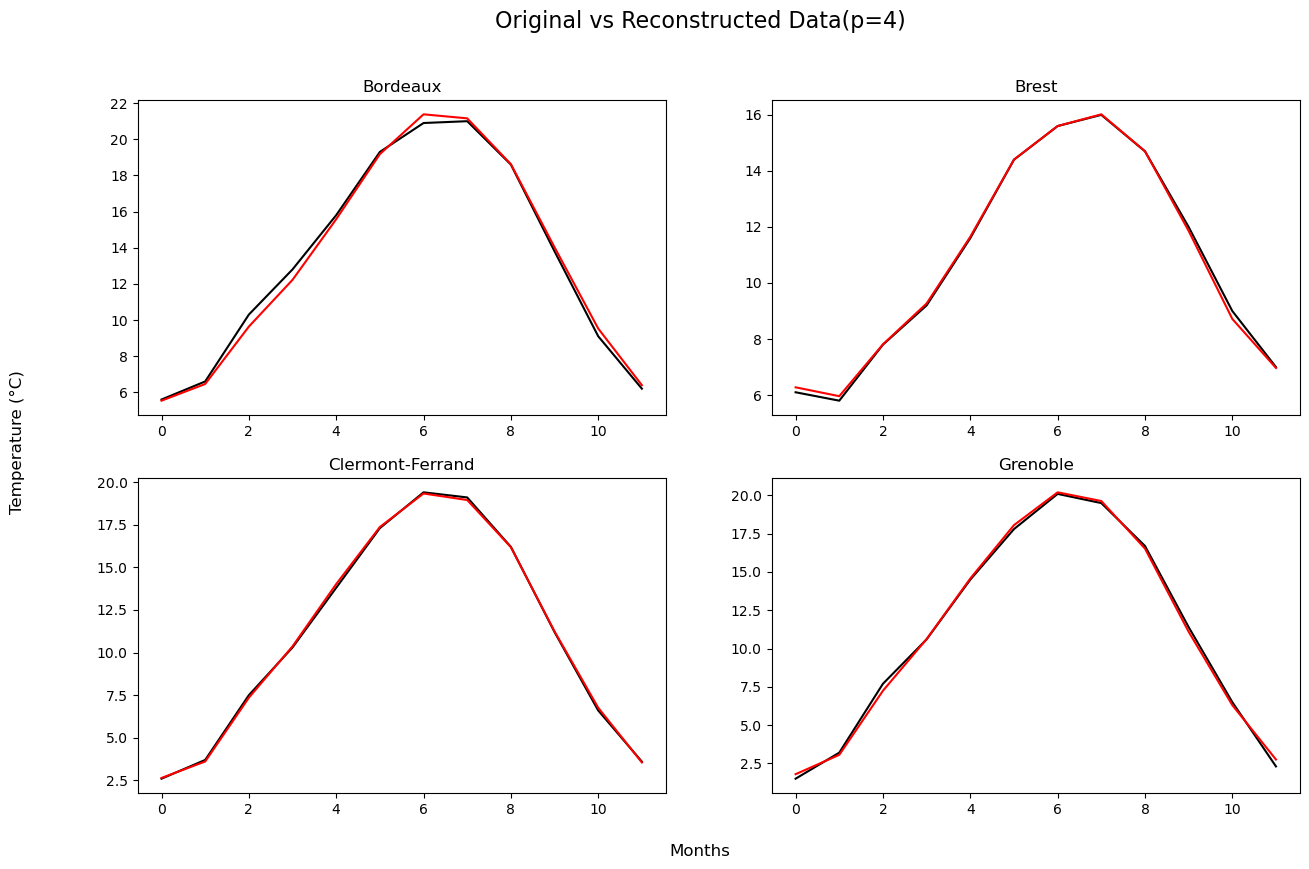

In [ ]:
#let p=4
p=2
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x1)
x1_pca=temp_pca.transform(x1)
x_inverse=temp_pca.inverse_transform(x1_pca)
# Create figure and axes
fig, axes = plt.subplots(2,4//2,figsize=(15, 9))

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    if(i ==2 ):
        index+=1
    axes[index,i%2].plot(x1[i],color='black',label='original')
    axes[index,i%2].plot(x_inverse[i],color='red',label='reconstructed')
    axes[index,i%2].set_title(cities[i])


fig.suptitle('Original vs Reconstructed Data(p=4)', fontsize=16)
fig.text(0.5, 0.04, 'Months', ha='center', fontsize=12)        # x-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical', fontsize=12)  # y-axis label

plt.show()


# as we have seen the previously with 2 components we capture most of the variation hence between p=4
# and p=2 there's no big difference. Altough from p=1 and p=2 the explained variance ratio changesa lot
# and that explaines how p=1 doesn't have a good reconstruction

#### Digits Dataset

In [301]:
digit_cov_matrix=np.cov(x2.T)

<Axes: >

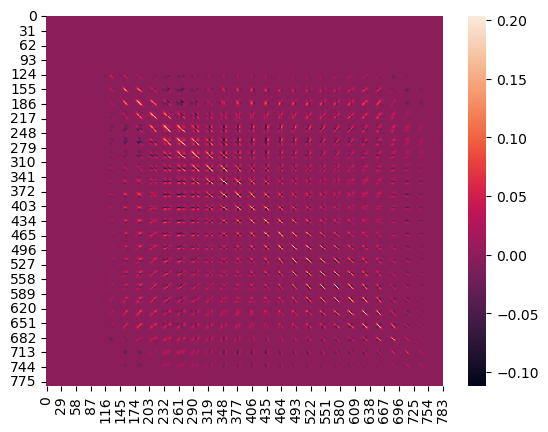

In [ ]:
sns.heatmap(digit_cov_matrix)
#first we can see that there's frame in the matrix as if  pixels on the extreme aren't correlated so this 
#is pretty much logicall as our number tend to be centred. 
#  


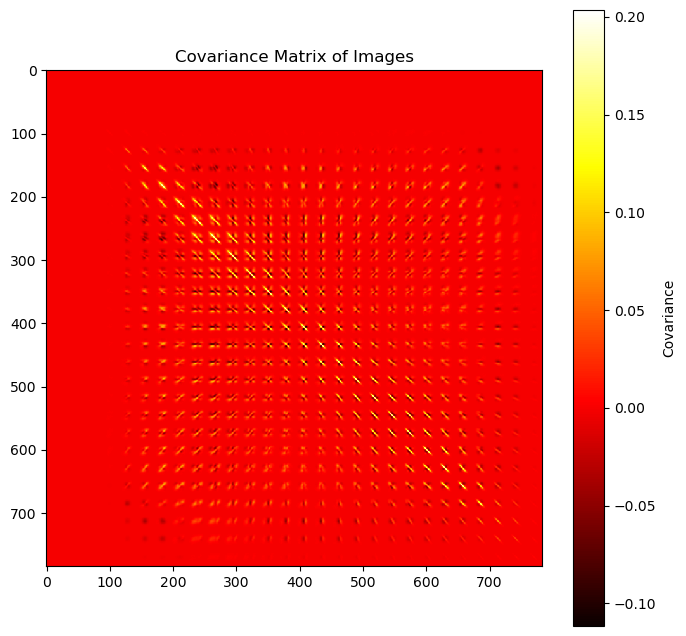

In [303]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(digit_cov_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix of Images')
plt.show()


In [ ]:
from matplotlib.lines import Line2D

digit_pca=PCA(n_components=None)
x2_2D = digit_pca.fit_transform(x2)



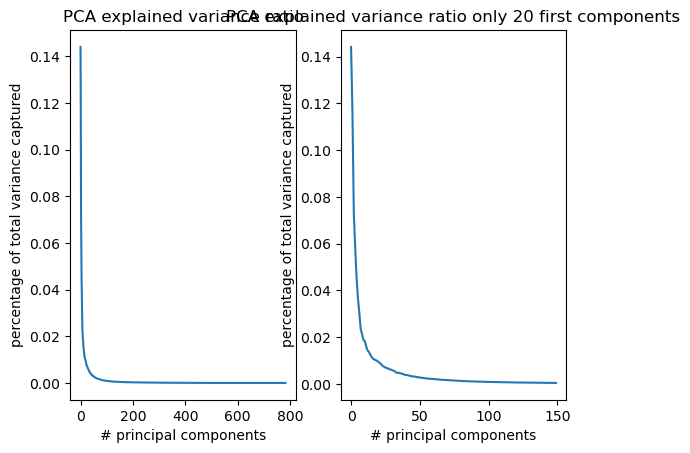

In [ ]:
#Now for the plot

# Create figure and axes
fig, ax = plt.subplots(1,2)

# Scatter plot with color
ax[0].plot(digit_pca.explained_variance_ratio_)
ax[0].set_ylabel('percentage of total variance captured')
ax[0].set_xlabel('# principal components')

ax[1].plot(digit_pca.explained_variance_ratio_[:150])
ax[1].set_ylabel('percentage of total variance captured')
ax[1].set_xlabel('# principal components')

ax[0].set_title('PCA explained variance ratio')
ax[1].set_title('PCA explained variance ratio only 20 first components')

plt.show()

#clearly with almost 70 or 80 pcs we capture the most of the values
# if we use p=2 ther's a considerable reduction but this is still very fare from expected

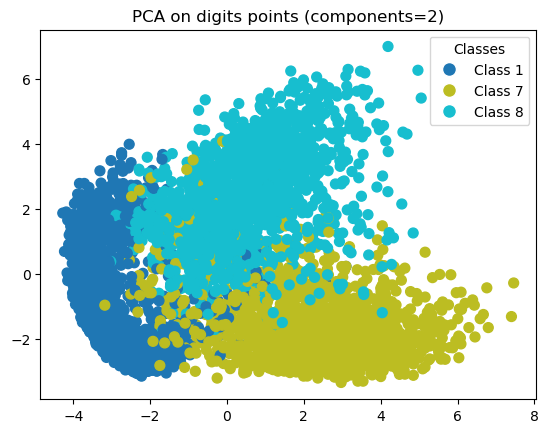

In [317]:
from matplotlib.lines import Line2D


digit_pca=PCA(n_components=2)
x2_2D = digit_pca.fit_transform(x2)



# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)


#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('PCA on digits points (components=2)')


plt.show()


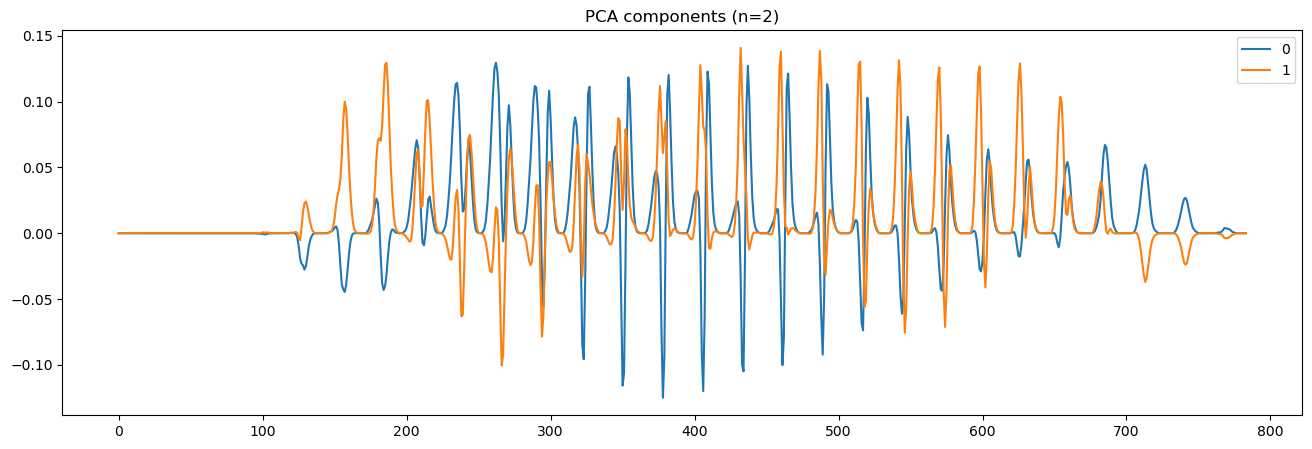

In [321]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(16,5))

# Scatter plot with color
for i,el in enumerate(digit_pca.components_):
    ax.plot(el,label=i)
    
ax.legend()
ax.set_title('PCA components (n=2)')
plt.show()


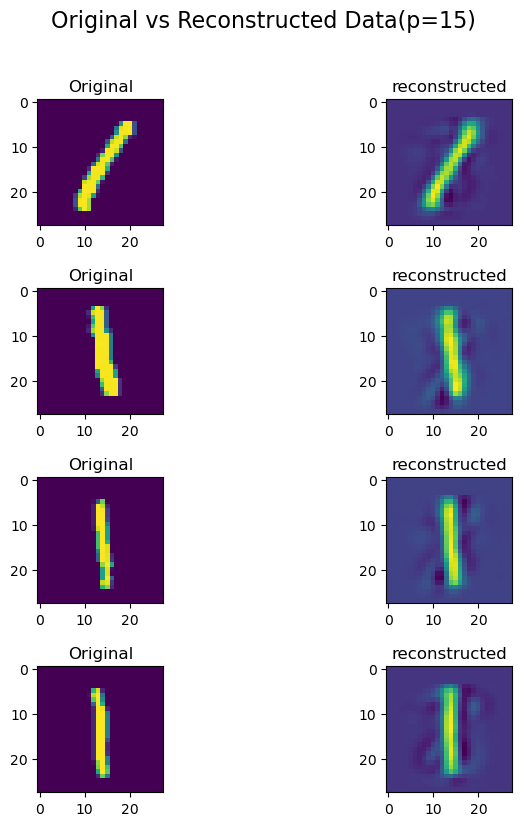

In [ ]:
#let p=4
p=15
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x2)
x2_pca=temp_pca.transform(x2)
x_inverse=temp_pca.inverse_transform(x2_pca)
# Create figure and axes
fig, axes = plt.subplots(4,2,figsize=(9, 9))
plt.subplots_adjust(hspace=0.5, wspace=0) 

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    axes[i,0].imshow(x2[i].reshape(28,28))
    axes[i,0].set_title('Original')
    axes[i,1].imshow(x_inverse[i].reshape(28,28))
    axes[i,1].set_title('reconstructed')



fig.suptitle(f'Original vs Reconstructed Data(p={p})', fontsize=16)

plt.show()




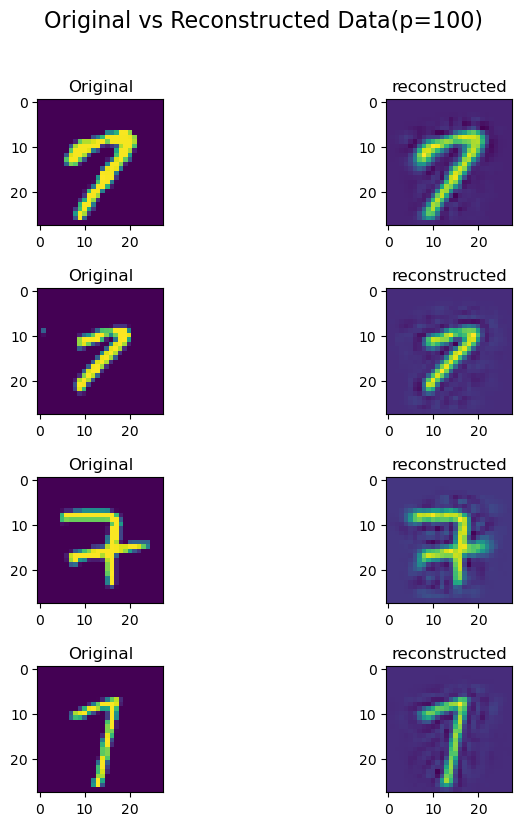

In [336]:
#let p=4
p=100
#do PCa with no imposed components
temp_pca=PCA(n_components=p)
temp_pca.fit(x2)
x2_pca=temp_pca.transform(x2)
x_inverse=temp_pca.inverse_transform(x2_pca)
# Create figure and axes
fig, axes = plt.subplots(4,2,figsize=(9, 9))
plt.subplots_adjust(hspace=0.5, wspace=0) 

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
index=0
for i in range(0,4):
    axes[i,0].imshow(x2[i+1000].reshape(28,28))
    axes[i,0].set_title('Original')
    axes[i,1].imshow(x_inverse[i+1000].reshape(28,28))
    axes[i,1].set_title('reconstructed')



fig.suptitle(f'Original vs Reconstructed Data(p={p})', fontsize=16)

plt.show()




In [ ]:

#let's transform the centroîds as well
centroids_2D = pca.transform(centroids)

#Now for the plot


# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)

for i in range(0,len(centroids_2D)):
    ax.scatter(centroids_2D[i][0],centroids_2D[i][1],color='black',edgecolors='black',linewidth=1.5,s=10)
    
    
#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('Kmeans on digits points')


plt.show()

#with k=4 we can observe a new cluster that encapsulates some class 1 and 7 which is expected since the writing 1, 7 
# are alot closer then 1,8 or 7,8.

